In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
root_dir = '/Users/kessapassa/OneDrive/research_log/20190114/'

In [3]:
dir_list = ['people10000', 'people20000', 'people30000']
seed_list = [str(123 + i) for i in range(1)]
csv_list = ['census']
area_list = [str(i) for i in range(81)]
area_one_length = 9

In [4]:
def create_base_dataframe():
    df = pd.DataFrame(columns=(['{0:02d}'.format(i*10) for i in range(area_one_length)]))
    return df

In [5]:
create_base_dataframe()

,00,10,20,30,40,50,60,70,80


In [6]:
# エリア番号を線形的な数から、iとjで回した数のようにする
def convert_area_to_contour(base, read):
    for r in np.asanyarray(read):
        area_id = int(r[0])
        row = str(area_id // area_one_length)
        col = str(area_id % area_one_length) + '0'
        base.loc[row, col] = r[1]
        
    return base

In [7]:
def area_to_contour(area_id):
    area_id = int(area_id)
    left = str(area_id // area_one_length)
    right = str(area_id % area_one_length) + '0'
    return left+right

In [8]:
base = create_base_dataframe()

csv_array = {}
for _dir in dir_list:
    csv_array[_dir] = {}
    for _seed in seed_list:
        csv_array[_dir][_seed] = {}
        for _csv in csv_list:
            csv_array[_dir][_seed][_csv] = {}
            for _area in area_list:
                df = pd.read_csv(root_dir + 'next_move_area_od_from_' + _csv + '/' + _dir + 'seed' + _seed + '_' + _csv + _area + '.csv',
                                                        encoding='Shift_JISx0213')
                df = convert_area_to_contour(base.copy(), df.copy())
#                 df = df / df.sum().sum()
                df = df.sort_index(ascending=False)
                df.fillna(0, inplace=True)
                
                _area = area_to_contour(_area)
                csv_array[_dir][_seed][_csv][_area] = df

In [9]:
def create_contour(df):
#     plt.figure(figsize=(9,6))
    sns.heatmap(df, annot=True, fmt='.0f', cmap='RdYlGn_r',
               vmax=df.sum().mean())

In [10]:
people = 'people30000'
seed = '123'
csv = 'census'

In [11]:
df_area_sum = pd.DataFrame(columns=['area', 'sum'])
for area in [area_to_contour(i) for i in area_list]:
    df = pd.DataFrame([area, csv_array[people][seed][csv][area].sum().sum()], index=['area', 'sum']).T
    df_area_sum = pd.concat([df_area_sum, df])
df_area_sum.reset_index(drop=True, inplace=True)
# df_area_sum = df_area_sum[df_area_sum['sum'] > 0]
df_area_sum.sort_values(by=['sum'], ascending=False)

,area,sum
40,440,6103
49,540,4545
50,550,4180
41,450,2080
58,640,1595
31,340,1357
30,330,1209
59,650,694
29,320,615
19,210,503


# コンター図

6103.0


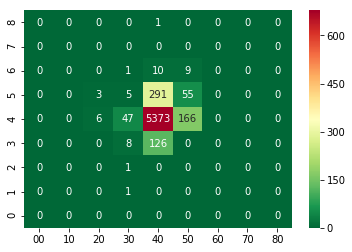

In [12]:
area = '440'
print(csv_array[people][seed][csv][area].sum().sum())
create_contour(csv_array[people][seed][csv][area])

4180.0


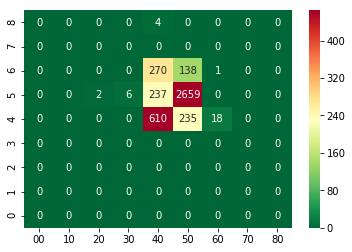

In [13]:
area = '550'
print(csv_array[people][seed][csv][area].sum().sum())
create_contour(csv_array[people][seed][csv][area])

4545.0


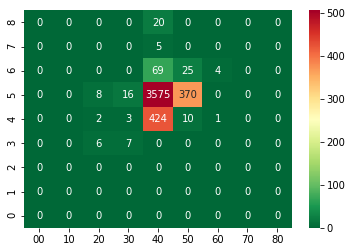

In [14]:
area = '540'
print(csv_array[people][seed][csv][area].sum().sum())
create_contour(csv_array[people][seed][csv][area])

2080.0


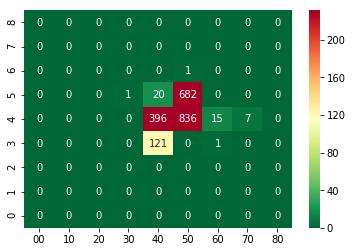

In [15]:
area = '450'
print(csv_array[people][seed][csv][area].sum().sum())
create_contour(csv_array[people][seed][csv][area])

1595.0


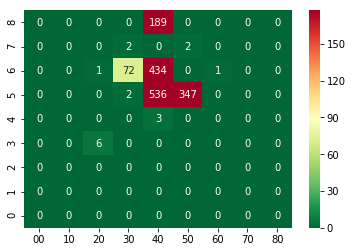

In [16]:
area = '640'
print(csv_array[people][seed][csv][area].sum().sum())
create_contour(csv_array[people][seed][csv][area])

1209.0


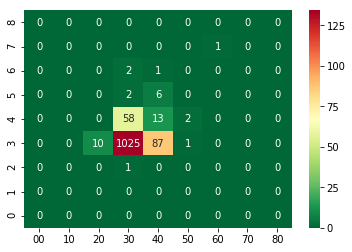

In [17]:
area = '330'
print(csv_array[people][seed][csv][area].sum().sum())
create_contour(csv_array[people][seed][csv][area])